# Simulation d'une cavité carrée avec les plans de symétrie (XZ) et (YZ), la postion du carré : normale 

In [42]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Video

In [2]:
# Initialized parameter 

b = 1          # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.02     # the thickness of pml layer
pad = 0.01     # the padding between the cavity and the pml layer
n = 1.5        # refractive index the cavity ( ~ resin)
resolution = 500
len_scale = 25

sxy = b + 2*pml + 2*pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions
boudary_layer = mp.PML(pml)

# The geometry of the cavity
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

# Injected sources
wl = 0.8                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/wl          # pulse center frequency
df = 15                      # pulse frequency width
src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0))

#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=[src],
                    symmetries=[mp.Mirror(mp.X), mp.Mirror(mp.Y)],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.000981092 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.134247 s
-----------


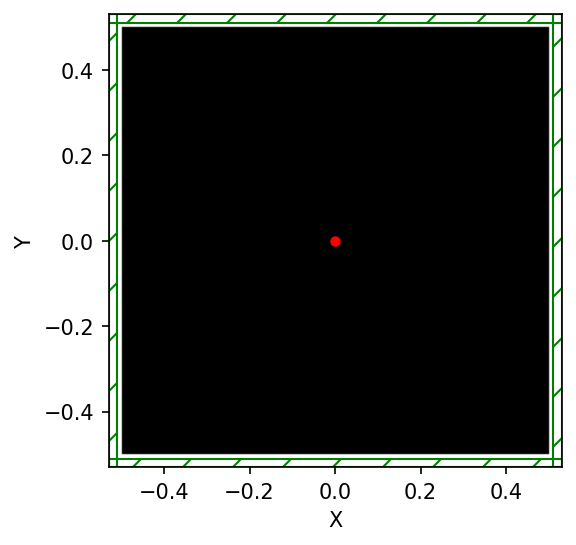

In [4]:
# visualize the cavité
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [6]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Ez
h1 = mp.Harminv(mp.Ez, mp.Vector3(0,0), fcen, df)   

sim.run(mp.after_sources(h1),
        until_after_sources=600)

FloatProgress(value=0.0, description='0% done ', max=600.6666666865349)

Meep progress: 16.196/600.6666666865349 = 2.7% done in 4.0s, 144.4s to go
on time step 16217 (time=16.217), 0.000246668 s/step
Meep progress: 32.542/600.6666666865349 = 5.4% done in 8.0s, 139.7s to go
on time step 32564 (time=32.564), 0.000244699 s/step
Meep progress: 48.724000000000004/600.6666666865349 = 8.1% done in 12.0s, 135.9s to go
on time step 48749 (time=48.749), 0.000247145 s/step
Meep progress: 64.898/600.6666666865349 = 10.8% done in 16.0s, 132.1s to go
on time step 64926 (time=64.926), 0.000247271 s/step
Meep progress: 81.113/600.6666666865349 = 13.5% done in 20.0s, 128.1s to go
on time step 81142 (time=81.142), 0.000246677 s/step
Meep progress: 97.389/600.6666666865349 = 16.2% done in 24.0s, 124.0s to go
on time step 97421 (time=97.421), 0.000245719 s/step
Meep progress: 113.61/600.6666666865349 = 18.9% done in 28.0s, 120.0s to go
on time step 113643 (time=113.643), 0.000246582 s/step
Meep progress: 129.75900000000001/600.6666666865349 = 21.6% done in 32.0s, 116.1s to go


In [7]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Hx
h2 = mp.Harminv(mp.Hx, mp.Vector3(0,0), fcen, df)   

sim.reset_meep()
sim.run(mp.after_sources(h2),
        until_after_sources=600)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00128102 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.139259 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.6666666865349)

Meep progress: 17.366/600.6666666865349 = 2.9% done in 4.0s, 134.4s to go
on time step 17392 (time=17.392), 0.00023 s/step
Meep progress: 34.936/600.6666666865349 = 5.8% done in 8.0s, 129.6s to go
on time step 34964 (time=34.964), 0.000227646 s/step
Meep progress: 52.507/600.6666666865349 = 8.7% done in 12.0s, 125.3s to go
on time step 52537 (time=52.537), 0.000227624 s/step
Meep progress: 70.033/600.6666666865349 = 11.7% done in 16.0s, 121.2s to go
on time step 70066 (time=70.066), 0.000228198 s/step
Meep progress: 87.58200000000001/600.6666666865349 = 14.6% done in 20.0s, 117.2s to go
on time step 87617 (time=87.617), 0.000227913 s/step
Meep progress: 105.14/600.6666666865349 = 17.5% done in 24.0s, 113.1s to go
on time step 105177 (time=105.177), 0.000227797 s/step
Meep progress: 122.709/600.6666666865349 = 20.4% done in 28.0s, 109.1s to go
on time step 122748 (time=122.748), 0.000227652 s/step
Meep progress: 140.32/600.6666666865349 = 23.4% done in 32.0s, 105.0s to go
on time step 1

In [8]:
# Chercher les fréquences de résonnance autour de fcen avec la composante Hy
h3 = mp.Harminv(mp.Hy, mp.Vector3(0,0), fcen, df)   

sim.reset_meep()
sim.run(mp.after_sources(h3),
        until_after_sources=600)

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00129604 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.142092 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.6666666865349)

Meep progress: 17.298000000000002/600.6666666865349 = 2.9% done in 4.0s, 134.9s to go
on time step 17323 (time=17.323), 0.000230912 s/step
Meep progress: 34.749/600.6666666865349 = 5.8% done in 8.0s, 130.3s to go
on time step 34777 (time=34.777), 0.000229185 s/step
Meep progress: 52.037/600.6666666865349 = 8.7% done in 12.0s, 126.5s to go
on time step 52067 (time=52.067), 0.000231353 s/step
Meep progress: 69.505/600.6666666865349 = 11.6% done in 16.0s, 122.3s to go
on time step 69536 (time=69.536), 0.00022898 s/step
Meep progress: 87.068/600.6666666865349 = 14.5% done in 20.0s, 118.0s to go
on time step 87102 (time=87.102), 0.00022772 s/step
Meep progress: 104.084/600.6666666865349 = 17.3% done in 24.0s, 114.5s to go
on time step 104120 (time=104.12), 0.000235054 s/step
Meep progress: 121.659/600.6666666865349 = 20.3% done in 28.0s, 110.2s to go
on time step 121697 (time=121.697), 0.000227574 s/step
Meep progress: 139.228/600.6666666865349 = 23.2% done in 32.0s, 106.1s to go
on time st

## Observation : Il n'y a aucun mode avec la recherche da la composant Hy

In [56]:
mode_Ez = np.array(h1.modes)
mode_Hx = np.array(h2.modes)
res_modes = np.vstack((mode_Ez, mode_Hx))
print(np.shape(res_modes))

(197, 5)


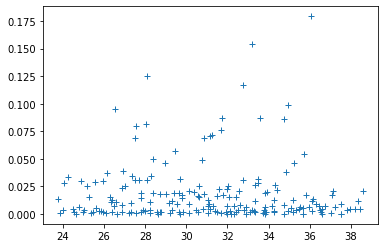

In [16]:
plt.plot(np.abs(res_modes[:,0]), np.abs(res_modes[:,1]), '+')

In [53]:
sim.reset_meep()
fcen=np.abs(res_modes[0][0])
df = 0.01
sim.sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Ez, mp.Vector3(0))]

# Start the simulation and get into steady state
sim.run(until=600) 

# Prepare the animator and record the steady state response
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(1/fcen/20, Animate),until=1/fcen)

# Close the animator's working frame
plt.close()

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00179315 s
Working in 2D dimensions.
Computational cell is 1.06 x 1.06 x 0 with resolution 500
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.136885 s
-----------


FloatProgress(value=0.0, description='0% done ', max=600.0)

Meep progress: 17.471/600.0 = 2.9% done in 4.0s, 133.4s to go
on time step 17496 (time=17.496), 0.00022863 s/step
Meep progress: 35.999/600.0 = 6.0% done in 8.0s, 125.3s to go
on time step 36025 (time=36.025), 0.000215886 s/step
Meep progress: 55.0/600.0 = 9.2% done in 12.0s, 118.9s to go
on time step 55030 (time=55.03), 0.000210475 s/step
Meep progress: 74.099/600.0 = 12.3% done in 16.0s, 113.6s to go
on time step 74131 (time=74.131), 0.000209419 s/step
Meep progress: 90.95400000000001/600.0 = 15.2% done in 20.0s, 111.9s to go
on time step 90982 (time=90.982), 0.000237385 s/step
Meep progress: 105.056/600.0 = 17.5% done in 24.0s, 113.1s to go
on time step 105092 (time=105.092), 0.000283499 s/step
Meep progress: 120.497/600.0 = 20.1% done in 28.0s, 111.4s to go
on time step 120528 (time=120.528), 0.00025914 s/step
Meep progress: 137.755/600.0 = 23.0% done in 32.0s, 107.4s to go
on time step 137796 (time=137.796), 0.000231659 s/step
Meep progress: 155.746/600.0 = 26.0% done in 36.0s, 10

FloatProgress(value=600.0, description='0% done ', max=600.0407654351346, min=600.0)

on time step 600000 (time=600), 0.000263605 s/step
Normalizing field data...
run 7 finished at t = 600.041 (600041 timesteps)


In [55]:
# Process the animation and view it
filename = "carre_symetrie1.mp4"
Animate.to_mp4(5,filename)
Video(filename)

Generating MP4...
